In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [2]:
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

In [3]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [4]:
from tqdm.notebook import tqdm
from PIL import Image
import os

In [5]:
from torchinfo import summary

### read images

In [6]:
path = r'C:\Users\liuya\Downloads\3d_printing_research\clipped_samples_otsu'
## path = r'C:\Users\liuya\Downloads\3d_printing_research\clipped_samples'
image_list = os.listdir(path)

In [7]:
full_path = os.path.join(path, image_list[350])
np.array(Image.open(full_path).convert('RGB')).shape

(250, 730, 3)

In [8]:
image_ls = []

for i in tqdm(image_list):
    full_path = os.path.join(path, i)
    img = Image.open(full_path).convert('L')
    img_array = np.asarray(img).flatten()
    image_ls.append(img_array)

  0%|          | 0/4046 [00:00<?, ?it/s]

In [9]:
### normalize
data_input = np.array(image_ls)

In [10]:
data_input.shape

(4046, 182500)

In [11]:
data_input = np.divide((data_input-np.min(data_input)), (np.max(data_input)-np.min(data_input)))

In [12]:
## data_input = torch.tensor(data_input[:,None,:,:], dtype=torch.float32)
data_input = torch.tensor(data_input, dtype=torch.float32)

### build the model

In [13]:
class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
    
        self.encoder = nn.Sequential(
            ## 250*730=182500
            nn.Linear(250*730, 512),
            nn.ReLU(),
            nn.Linear(512, 64),
            nn.ReLU(),
            nn.Linear(64, 8))

        self.decoder = nn.Sequential(
            nn.Linear(8, 64),
            nn.ReLU(),
            nn.Linear(64, 512),
            nn.ReLU(),
            nn.Linear(512, 182500),
            nn.Sigmoid())
    
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [14]:
model = Autoencoder()

### train the model

In [15]:
def train(model, device, train_loader, optimizer, epoch):
    
    model.train() #trian model
    for batch_idx, data in enumerate(train_loader):
        data = data.to(device)
        optimizer.zero_grad()
        output = model(data)

        ##calculate loss
        ##loss = 0
        ##for i in range(data.shape[0]):
            ##loss += F.mse_loss(output[i], data[i], reduction='sum')
        ##loss /= data.shape[0]
        loss = F.mse_loss(output, data)
        loss.backward()
        optimizer.step()
        # print result every 10 batch
        if batch_idx % 10 == 0:
            print('Train Epoch: {} ... Batch: {} ... Loss: {:.8f}'.format(epoch, batch_idx, loss))

In [16]:
def test(model, device, test_loader):
    model.eval() #evaluate model
    test_loss = 0
    with torch.no_grad():
        for data in test_loader:
            data = data.to(device)
            output = model(data)
            #calculate sum loss
            test_loss += F.mse_loss(output, data, reduction='sum').item()
    
        test_loss /= len(test_loader.dataset)
        print('------------------- Test set: Average loss: {:.4f} ... Samples: {}'.format(test_loss, len(test_loader.dataset)))

### train and test split

In [17]:
train_window_, val_window_ = train_test_split(data_input, test_size=0.2, random_state=2022)

In [18]:
train_window_.shape

torch.Size([3236, 182500])

In [19]:
train_loader = torch.utils.data.DataLoader(train_window_, batch_size=16,shuffle=True)
test_loader = torch.utils.data.DataLoader(val_window_, batch_size=16,shuffle=False)

In [20]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [21]:
model = model.to(device)

In [55]:
optimizer = optim.Adam(model.parameters(), lr=0.00001)

In [56]:
epochs = 100

In [57]:
for epoch in range(1, epochs + 1):
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)

Train Epoch: 1 ... Batch: 0 ... Loss: 0.00164014
Train Epoch: 1 ... Batch: 10 ... Loss: 0.00193552
Train Epoch: 1 ... Batch: 20 ... Loss: 0.00196117
Train Epoch: 1 ... Batch: 30 ... Loss: 0.00230773
Train Epoch: 1 ... Batch: 40 ... Loss: 0.00210383
Train Epoch: 1 ... Batch: 50 ... Loss: 0.00190351
Train Epoch: 1 ... Batch: 60 ... Loss: 0.00154617
Train Epoch: 1 ... Batch: 70 ... Loss: 0.00194986
Train Epoch: 1 ... Batch: 80 ... Loss: 0.00204894
Train Epoch: 1 ... Batch: 90 ... Loss: 0.00203136
Train Epoch: 1 ... Batch: 100 ... Loss: 0.00182606
Train Epoch: 1 ... Batch: 110 ... Loss: 0.00188021
Train Epoch: 1 ... Batch: 120 ... Loss: 0.00181447
Train Epoch: 1 ... Batch: 130 ... Loss: 0.00206819
Train Epoch: 1 ... Batch: 140 ... Loss: 0.00219748
Train Epoch: 1 ... Batch: 150 ... Loss: 0.00228457
Train Epoch: 1 ... Batch: 160 ... Loss: 0.00182335
Train Epoch: 1 ... Batch: 170 ... Loss: 0.00188555
Train Epoch: 1 ... Batch: 180 ... Loss: 0.00174191
Train Epoch: 1 ... Batch: 190 ... Loss: 0.

Train Epoch: 8 ... Batch: 60 ... Loss: 0.00218337
Train Epoch: 8 ... Batch: 70 ... Loss: 0.00226493
Train Epoch: 8 ... Batch: 80 ... Loss: 0.00209180
Train Epoch: 8 ... Batch: 90 ... Loss: 0.00212219
Train Epoch: 8 ... Batch: 100 ... Loss: 0.00168326
Train Epoch: 8 ... Batch: 110 ... Loss: 0.00230667
Train Epoch: 8 ... Batch: 120 ... Loss: 0.00198152
Train Epoch: 8 ... Batch: 130 ... Loss: 0.00220792
Train Epoch: 8 ... Batch: 140 ... Loss: 0.00210697
Train Epoch: 8 ... Batch: 150 ... Loss: 0.00205672
Train Epoch: 8 ... Batch: 160 ... Loss: 0.00202605
Train Epoch: 8 ... Batch: 170 ... Loss: 0.00192972
Train Epoch: 8 ... Batch: 180 ... Loss: 0.00186204
Train Epoch: 8 ... Batch: 190 ... Loss: 0.00196260
Train Epoch: 8 ... Batch: 200 ... Loss: 0.00197416
------------------- Test set: Average loss: 482.1555 ... Samples: 810
Train Epoch: 9 ... Batch: 0 ... Loss: 0.00188594
Train Epoch: 9 ... Batch: 10 ... Loss: 0.00168775
Train Epoch: 9 ... Batch: 20 ... Loss: 0.00218043
Train Epoch: 9 ... B

Train Epoch: 15 ... Batch: 100 ... Loss: 0.00180631
Train Epoch: 15 ... Batch: 110 ... Loss: 0.00196114
Train Epoch: 15 ... Batch: 120 ... Loss: 0.00191753
Train Epoch: 15 ... Batch: 130 ... Loss: 0.00214466
Train Epoch: 15 ... Batch: 140 ... Loss: 0.00195710
Train Epoch: 15 ... Batch: 150 ... Loss: 0.00161788
Train Epoch: 15 ... Batch: 160 ... Loss: 0.00179711
Train Epoch: 15 ... Batch: 170 ... Loss: 0.00187425
Train Epoch: 15 ... Batch: 180 ... Loss: 0.00192673
Train Epoch: 15 ... Batch: 190 ... Loss: 0.00177481
Train Epoch: 15 ... Batch: 200 ... Loss: 0.00198056
------------------- Test set: Average loss: 480.6351 ... Samples: 810
Train Epoch: 16 ... Batch: 0 ... Loss: 0.00194987
Train Epoch: 16 ... Batch: 10 ... Loss: 0.00191486
Train Epoch: 16 ... Batch: 20 ... Loss: 0.00170456
Train Epoch: 16 ... Batch: 30 ... Loss: 0.00206725
Train Epoch: 16 ... Batch: 40 ... Loss: 0.00183754
Train Epoch: 16 ... Batch: 50 ... Loss: 0.00183026
Train Epoch: 16 ... Batch: 60 ... Loss: 0.00198567
Tr

Train Epoch: 22 ... Batch: 130 ... Loss: 0.00232091
Train Epoch: 22 ... Batch: 140 ... Loss: 0.00192825
Train Epoch: 22 ... Batch: 150 ... Loss: 0.00200101
Train Epoch: 22 ... Batch: 160 ... Loss: 0.00201952
Train Epoch: 22 ... Batch: 170 ... Loss: 0.00189523
Train Epoch: 22 ... Batch: 180 ... Loss: 0.00178960
Train Epoch: 22 ... Batch: 190 ... Loss: 0.00194504
Train Epoch: 22 ... Batch: 200 ... Loss: 0.00197283
------------------- Test set: Average loss: 479.4202 ... Samples: 810
Train Epoch: 23 ... Batch: 0 ... Loss: 0.00217143
Train Epoch: 23 ... Batch: 10 ... Loss: 0.00192500
Train Epoch: 23 ... Batch: 20 ... Loss: 0.00184244
Train Epoch: 23 ... Batch: 30 ... Loss: 0.00217367
Train Epoch: 23 ... Batch: 40 ... Loss: 0.00175639
Train Epoch: 23 ... Batch: 50 ... Loss: 0.00219292
Train Epoch: 23 ... Batch: 60 ... Loss: 0.00200819
Train Epoch: 23 ... Batch: 70 ... Loss: 0.00189429
Train Epoch: 23 ... Batch: 80 ... Loss: 0.00198876
Train Epoch: 23 ... Batch: 90 ... Loss: 0.00180397
Train

Train Epoch: 29 ... Batch: 160 ... Loss: 0.00210745
Train Epoch: 29 ... Batch: 170 ... Loss: 0.00193539
Train Epoch: 29 ... Batch: 180 ... Loss: 0.00201943
Train Epoch: 29 ... Batch: 190 ... Loss: 0.00182212
Train Epoch: 29 ... Batch: 200 ... Loss: 0.00167982
------------------- Test set: Average loss: 478.6121 ... Samples: 810
Train Epoch: 30 ... Batch: 0 ... Loss: 0.00193108
Train Epoch: 30 ... Batch: 10 ... Loss: 0.00189113
Train Epoch: 30 ... Batch: 20 ... Loss: 0.00209585
Train Epoch: 30 ... Batch: 30 ... Loss: 0.00183768
Train Epoch: 30 ... Batch: 40 ... Loss: 0.00184036
Train Epoch: 30 ... Batch: 50 ... Loss: 0.00215095
Train Epoch: 30 ... Batch: 60 ... Loss: 0.00168528
Train Epoch: 30 ... Batch: 70 ... Loss: 0.00174733
Train Epoch: 30 ... Batch: 80 ... Loss: 0.00177619
Train Epoch: 30 ... Batch: 90 ... Loss: 0.00203009
Train Epoch: 30 ... Batch: 100 ... Loss: 0.00183849
Train Epoch: 30 ... Batch: 110 ... Loss: 0.00187747
Train Epoch: 30 ... Batch: 120 ... Loss: 0.00207539
Train

Train Epoch: 36 ... Batch: 190 ... Loss: 0.00206161
Train Epoch: 36 ... Batch: 200 ... Loss: 0.00207772
------------------- Test set: Average loss: 477.4248 ... Samples: 810
Train Epoch: 37 ... Batch: 0 ... Loss: 0.00171119
Train Epoch: 37 ... Batch: 10 ... Loss: 0.00173829
Train Epoch: 37 ... Batch: 20 ... Loss: 0.00202285
Train Epoch: 37 ... Batch: 30 ... Loss: 0.00180937
Train Epoch: 37 ... Batch: 40 ... Loss: 0.00211642
Train Epoch: 37 ... Batch: 50 ... Loss: 0.00173363
Train Epoch: 37 ... Batch: 60 ... Loss: 0.00174633
Train Epoch: 37 ... Batch: 70 ... Loss: 0.00202161
Train Epoch: 37 ... Batch: 80 ... Loss: 0.00210192
Train Epoch: 37 ... Batch: 90 ... Loss: 0.00183216
Train Epoch: 37 ... Batch: 100 ... Loss: 0.00199999
Train Epoch: 37 ... Batch: 110 ... Loss: 0.00179537
Train Epoch: 37 ... Batch: 120 ... Loss: 0.00224361
Train Epoch: 37 ... Batch: 130 ... Loss: 0.00208519
Train Epoch: 37 ... Batch: 140 ... Loss: 0.00187884
Train Epoch: 37 ... Batch: 150 ... Loss: 0.00188286
Train

Train Epoch: 44 ... Batch: 10 ... Loss: 0.00209422
Train Epoch: 44 ... Batch: 20 ... Loss: 0.00207007
Train Epoch: 44 ... Batch: 30 ... Loss: 0.00218716
Train Epoch: 44 ... Batch: 40 ... Loss: 0.00183821
Train Epoch: 44 ... Batch: 50 ... Loss: 0.00181351
Train Epoch: 44 ... Batch: 60 ... Loss: 0.00185190
Train Epoch: 44 ... Batch: 70 ... Loss: 0.00195962
Train Epoch: 44 ... Batch: 80 ... Loss: 0.00207473
Train Epoch: 44 ... Batch: 90 ... Loss: 0.00158415
Train Epoch: 44 ... Batch: 100 ... Loss: 0.00178122
Train Epoch: 44 ... Batch: 110 ... Loss: 0.00222650
Train Epoch: 44 ... Batch: 120 ... Loss: 0.00174827
Train Epoch: 44 ... Batch: 130 ... Loss: 0.00177054
Train Epoch: 44 ... Batch: 140 ... Loss: 0.00192168
Train Epoch: 44 ... Batch: 150 ... Loss: 0.00203295
Train Epoch: 44 ... Batch: 160 ... Loss: 0.00203314
Train Epoch: 44 ... Batch: 170 ... Loss: 0.00195925
Train Epoch: 44 ... Batch: 180 ... Loss: 0.00172121
Train Epoch: 44 ... Batch: 190 ... Loss: 0.00211127
Train Epoch: 44 ... B

Train Epoch: 51 ... Batch: 40 ... Loss: 0.00166787
Train Epoch: 51 ... Batch: 50 ... Loss: 0.00167011
Train Epoch: 51 ... Batch: 60 ... Loss: 0.00228229
Train Epoch: 51 ... Batch: 70 ... Loss: 0.00178224
Train Epoch: 51 ... Batch: 80 ... Loss: 0.00203705
Train Epoch: 51 ... Batch: 90 ... Loss: 0.00202189
Train Epoch: 51 ... Batch: 100 ... Loss: 0.00199715
Train Epoch: 51 ... Batch: 110 ... Loss: 0.00177339
Train Epoch: 51 ... Batch: 120 ... Loss: 0.00214264
Train Epoch: 51 ... Batch: 130 ... Loss: 0.00171720
Train Epoch: 51 ... Batch: 140 ... Loss: 0.00169052
Train Epoch: 51 ... Batch: 150 ... Loss: 0.00166476
Train Epoch: 51 ... Batch: 160 ... Loss: 0.00180264
Train Epoch: 51 ... Batch: 170 ... Loss: 0.00193884
Train Epoch: 51 ... Batch: 180 ... Loss: 0.00173614
Train Epoch: 51 ... Batch: 190 ... Loss: 0.00176837
Train Epoch: 51 ... Batch: 200 ... Loss: 0.00203685
------------------- Test set: Average loss: 475.0215 ... Samples: 810
Train Epoch: 52 ... Batch: 0 ... Loss: 0.00180329
Tr

Train Epoch: 58 ... Batch: 70 ... Loss: 0.00222243
Train Epoch: 58 ... Batch: 80 ... Loss: 0.00187147
Train Epoch: 58 ... Batch: 90 ... Loss: 0.00174233
Train Epoch: 58 ... Batch: 100 ... Loss: 0.00196418
Train Epoch: 58 ... Batch: 110 ... Loss: 0.00202461
Train Epoch: 58 ... Batch: 120 ... Loss: 0.00181185
Train Epoch: 58 ... Batch: 130 ... Loss: 0.00219593
Train Epoch: 58 ... Batch: 140 ... Loss: 0.00201725
Train Epoch: 58 ... Batch: 150 ... Loss: 0.00172241
Train Epoch: 58 ... Batch: 160 ... Loss: 0.00208210
Train Epoch: 58 ... Batch: 170 ... Loss: 0.00196300
Train Epoch: 58 ... Batch: 180 ... Loss: 0.00173552
Train Epoch: 58 ... Batch: 190 ... Loss: 0.00159435
Train Epoch: 58 ... Batch: 200 ... Loss: 0.00224513
------------------- Test set: Average loss: 473.8628 ... Samples: 810
Train Epoch: 59 ... Batch: 0 ... Loss: 0.00169663
Train Epoch: 59 ... Batch: 10 ... Loss: 0.00206939
Train Epoch: 59 ... Batch: 20 ... Loss: 0.00146531
Train Epoch: 59 ... Batch: 30 ... Loss: 0.00175988
Tr

Train Epoch: 65 ... Batch: 100 ... Loss: 0.00200573
Train Epoch: 65 ... Batch: 110 ... Loss: 0.00182432
Train Epoch: 65 ... Batch: 120 ... Loss: 0.00181535
Train Epoch: 65 ... Batch: 130 ... Loss: 0.00214717
Train Epoch: 65 ... Batch: 140 ... Loss: 0.00193847
Train Epoch: 65 ... Batch: 150 ... Loss: 0.00173919
Train Epoch: 65 ... Batch: 160 ... Loss: 0.00203365
Train Epoch: 65 ... Batch: 170 ... Loss: 0.00185279
Train Epoch: 65 ... Batch: 180 ... Loss: 0.00164169
Train Epoch: 65 ... Batch: 190 ... Loss: 0.00188817
Train Epoch: 65 ... Batch: 200 ... Loss: 0.00199739
------------------- Test set: Average loss: 473.5303 ... Samples: 810
Train Epoch: 66 ... Batch: 0 ... Loss: 0.00186790
Train Epoch: 66 ... Batch: 10 ... Loss: 0.00188903
Train Epoch: 66 ... Batch: 20 ... Loss: 0.00216106
Train Epoch: 66 ... Batch: 30 ... Loss: 0.00181027
Train Epoch: 66 ... Batch: 40 ... Loss: 0.00201722
Train Epoch: 66 ... Batch: 50 ... Loss: 0.00197817
Train Epoch: 66 ... Batch: 60 ... Loss: 0.00186514
Tr

Train Epoch: 72 ... Batch: 130 ... Loss: 0.00184524
Train Epoch: 72 ... Batch: 140 ... Loss: 0.00180826
Train Epoch: 72 ... Batch: 150 ... Loss: 0.00225564
Train Epoch: 72 ... Batch: 160 ... Loss: 0.00197838
Train Epoch: 72 ... Batch: 170 ... Loss: 0.00171803
Train Epoch: 72 ... Batch: 180 ... Loss: 0.00189250
Train Epoch: 72 ... Batch: 190 ... Loss: 0.00182488
Train Epoch: 72 ... Batch: 200 ... Loss: 0.00202469
------------------- Test set: Average loss: 472.5590 ... Samples: 810
Train Epoch: 73 ... Batch: 0 ... Loss: 0.00173675
Train Epoch: 73 ... Batch: 10 ... Loss: 0.00186756
Train Epoch: 73 ... Batch: 20 ... Loss: 0.00179886
Train Epoch: 73 ... Batch: 30 ... Loss: 0.00177491
Train Epoch: 73 ... Batch: 40 ... Loss: 0.00162860
Train Epoch: 73 ... Batch: 50 ... Loss: 0.00199914
Train Epoch: 73 ... Batch: 60 ... Loss: 0.00178119
Train Epoch: 73 ... Batch: 70 ... Loss: 0.00191374
Train Epoch: 73 ... Batch: 80 ... Loss: 0.00138305
Train Epoch: 73 ... Batch: 90 ... Loss: 0.00201064
Train

Train Epoch: 79 ... Batch: 160 ... Loss: 0.00164565
Train Epoch: 79 ... Batch: 170 ... Loss: 0.00183595
Train Epoch: 79 ... Batch: 180 ... Loss: 0.00192607
Train Epoch: 79 ... Batch: 190 ... Loss: 0.00192022
Train Epoch: 79 ... Batch: 200 ... Loss: 0.00195055
------------------- Test set: Average loss: 470.6823 ... Samples: 810
Train Epoch: 80 ... Batch: 0 ... Loss: 0.00191489
Train Epoch: 80 ... Batch: 10 ... Loss: 0.00166306
Train Epoch: 80 ... Batch: 20 ... Loss: 0.00191501
Train Epoch: 80 ... Batch: 30 ... Loss: 0.00226489
Train Epoch: 80 ... Batch: 40 ... Loss: 0.00215081
Train Epoch: 80 ... Batch: 50 ... Loss: 0.00189342
Train Epoch: 80 ... Batch: 60 ... Loss: 0.00181912
Train Epoch: 80 ... Batch: 70 ... Loss: 0.00184509
Train Epoch: 80 ... Batch: 80 ... Loss: 0.00207130
Train Epoch: 80 ... Batch: 90 ... Loss: 0.00187516
Train Epoch: 80 ... Batch: 100 ... Loss: 0.00199758
Train Epoch: 80 ... Batch: 110 ... Loss: 0.00185666
Train Epoch: 80 ... Batch: 120 ... Loss: 0.00169476
Train

Train Epoch: 86 ... Batch: 190 ... Loss: 0.00188333
Train Epoch: 86 ... Batch: 200 ... Loss: 0.00231074
------------------- Test set: Average loss: 469.9995 ... Samples: 810
Train Epoch: 87 ... Batch: 0 ... Loss: 0.00234154
Train Epoch: 87 ... Batch: 10 ... Loss: 0.00186998
Train Epoch: 87 ... Batch: 20 ... Loss: 0.00181744
Train Epoch: 87 ... Batch: 30 ... Loss: 0.00203814
Train Epoch: 87 ... Batch: 40 ... Loss: 0.00183600
Train Epoch: 87 ... Batch: 50 ... Loss: 0.00178718
Train Epoch: 87 ... Batch: 60 ... Loss: 0.00192150
Train Epoch: 87 ... Batch: 70 ... Loss: 0.00185514
Train Epoch: 87 ... Batch: 80 ... Loss: 0.00172739
Train Epoch: 87 ... Batch: 90 ... Loss: 0.00193571
Train Epoch: 87 ... Batch: 100 ... Loss: 0.00180119
Train Epoch: 87 ... Batch: 110 ... Loss: 0.00173921
Train Epoch: 87 ... Batch: 120 ... Loss: 0.00178733
Train Epoch: 87 ... Batch: 130 ... Loss: 0.00217697
Train Epoch: 87 ... Batch: 140 ... Loss: 0.00172367
Train Epoch: 87 ... Batch: 150 ... Loss: 0.00196254
Train

Train Epoch: 94 ... Batch: 10 ... Loss: 0.00189350
Train Epoch: 94 ... Batch: 20 ... Loss: 0.00177964
Train Epoch: 94 ... Batch: 30 ... Loss: 0.00225694
Train Epoch: 94 ... Batch: 40 ... Loss: 0.00182088
Train Epoch: 94 ... Batch: 50 ... Loss: 0.00158854
Train Epoch: 94 ... Batch: 60 ... Loss: 0.00190734
Train Epoch: 94 ... Batch: 70 ... Loss: 0.00224461
Train Epoch: 94 ... Batch: 80 ... Loss: 0.00177675
Train Epoch: 94 ... Batch: 90 ... Loss: 0.00190811
Train Epoch: 94 ... Batch: 100 ... Loss: 0.00194768
Train Epoch: 94 ... Batch: 110 ... Loss: 0.00187729
Train Epoch: 94 ... Batch: 120 ... Loss: 0.00181214
Train Epoch: 94 ... Batch: 130 ... Loss: 0.00165992
Train Epoch: 94 ... Batch: 140 ... Loss: 0.00203057
Train Epoch: 94 ... Batch: 150 ... Loss: 0.00195832
Train Epoch: 94 ... Batch: 160 ... Loss: 0.00188965
Train Epoch: 94 ... Batch: 170 ... Loss: 0.00197442
Train Epoch: 94 ... Batch: 180 ... Loss: 0.00173649
Train Epoch: 94 ... Batch: 190 ... Loss: 0.00205496
Train Epoch: 94 ... B

In [58]:
### save the model
torch.save(model.state_dict(), 'fully_connected_network.pth')

### test the result

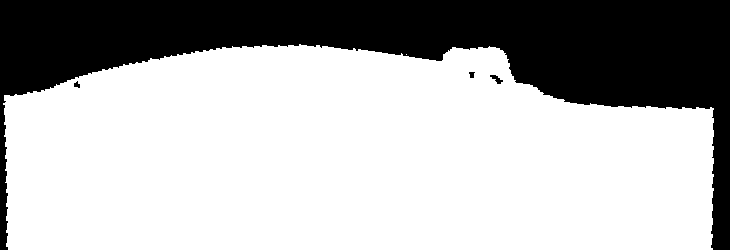

In [70]:
## cut the image
original = data_input[350].numpy().reshape((250,730))*255
Image.fromarray(original.astype('uint8'), 'L')

In [71]:
model.eval() #evaluate model
with torch.no_grad():
    data = data_input[350]
    #data = data[None,:,:,:]
    data = data.to(device)
    output = model(data)
    output = output.cpu()

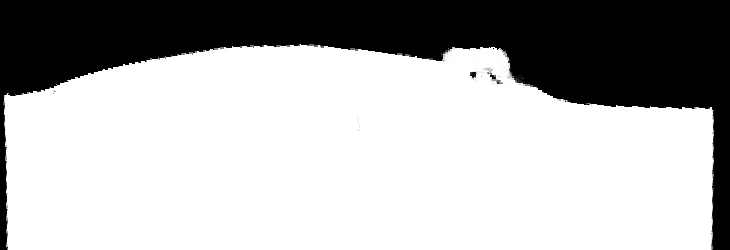

In [72]:
predict = output.numpy().reshape((250,730))*255
Image.fromarray(predict.astype('uint8'), 'L')